In [19]:
#1.Estimation par la méthode des moments
#1.1

#define function
runifa <- function(n) {
    if(!exists("param")) param <<- sample(10:20, 1)
    runif(n, min = 0, max = param)
}

estim <- function(n) {
    a=runifa(n)
    return(mean(a)*2)
}

param=10
estim(1000)

[1] 9.911267

In [20]:
#1.2

a1 <- replicate(1000, estim(1000))
head(a1,5)

[1] 10.225963  9.924593 10.189438 10.103026 10.030492

[1] 10

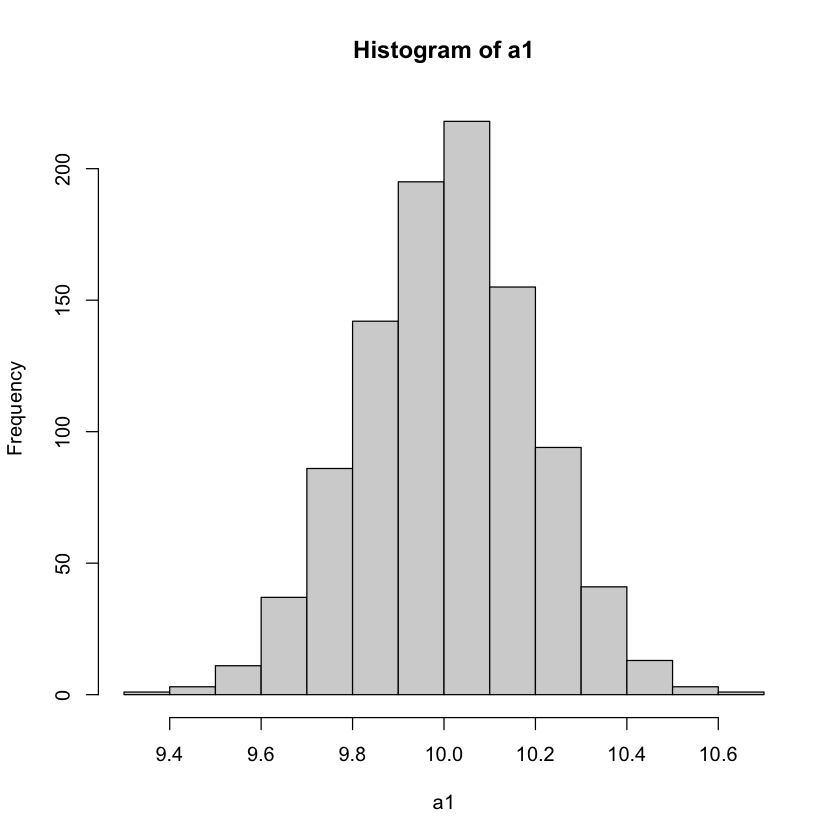

In [21]:
#1.3

hist(a1)
param

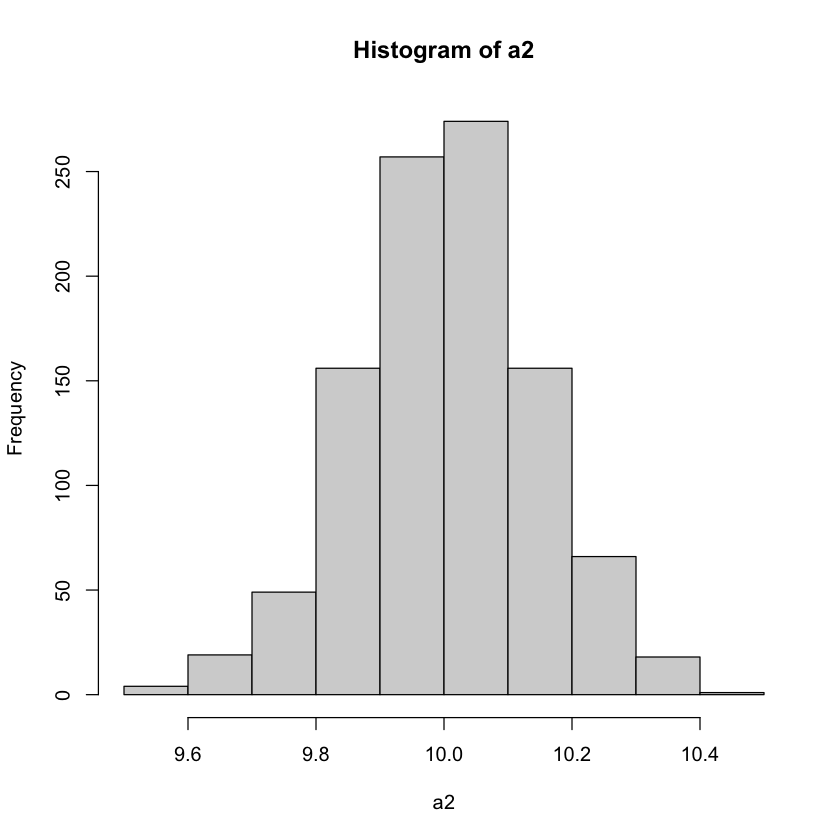

In [42]:
#1.4
estim2 <- function(n,k) {
    a=runifa(n);
    return((mean(a^k)*(k+1))^(1/k));
}

a2=replicate(1000,estim2(1000,2))
hist(a2)

In [24]:
#2 Théorème central limite
#2.1

runknown <- function(n) {
    bn <- rbinom(n, 1, 0.2)
    bn * rnorm(n, mean=-4, sd=1) + (1 - bn) * rnorm(n, mean=10, sd=1) 
}

estim3 <- function(n){
    a=runknown(n)
    a3=mean(a)
    a4=var(a)
    return(c(a3,a4))
}

#cc=estim3(1000)
#cc[1]
#cc[2]

cc=replicate(1000,estim3(1000))
rowMeans(cc)


[1]  7.191763 32.436496

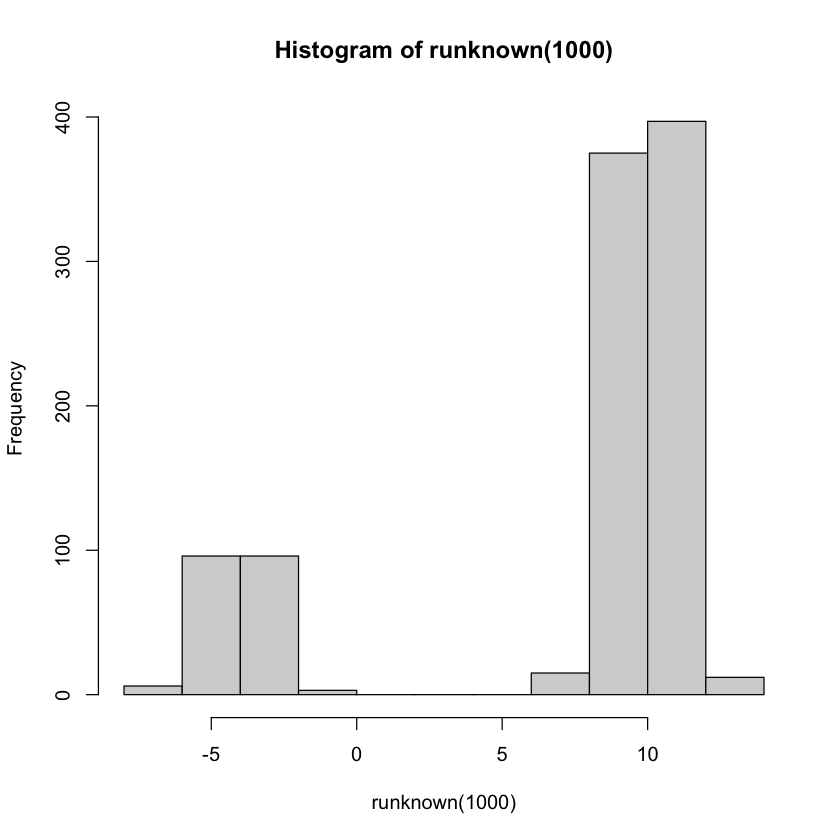

In [25]:
#2.2

hist(runknown(1000))

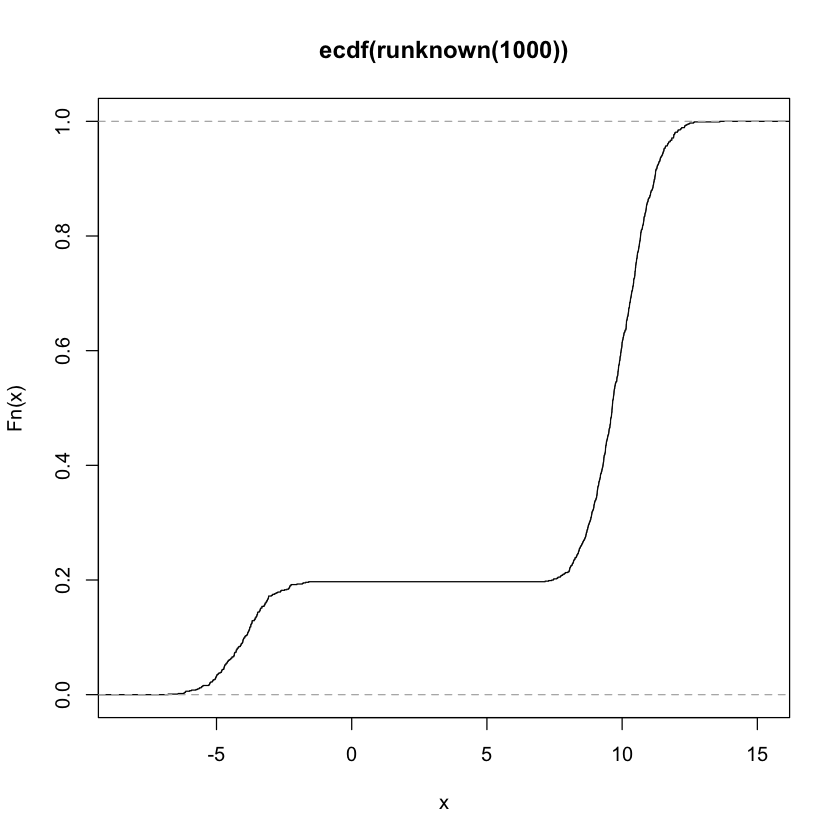

In [31]:
#7

plot(ecdf(runknown(1000)))

In [34]:
#8
n=1000
a=(mean(runknown(n))-7.2)*(n**0.5)/((32.36)**0.5)
a

[1] 1.691468

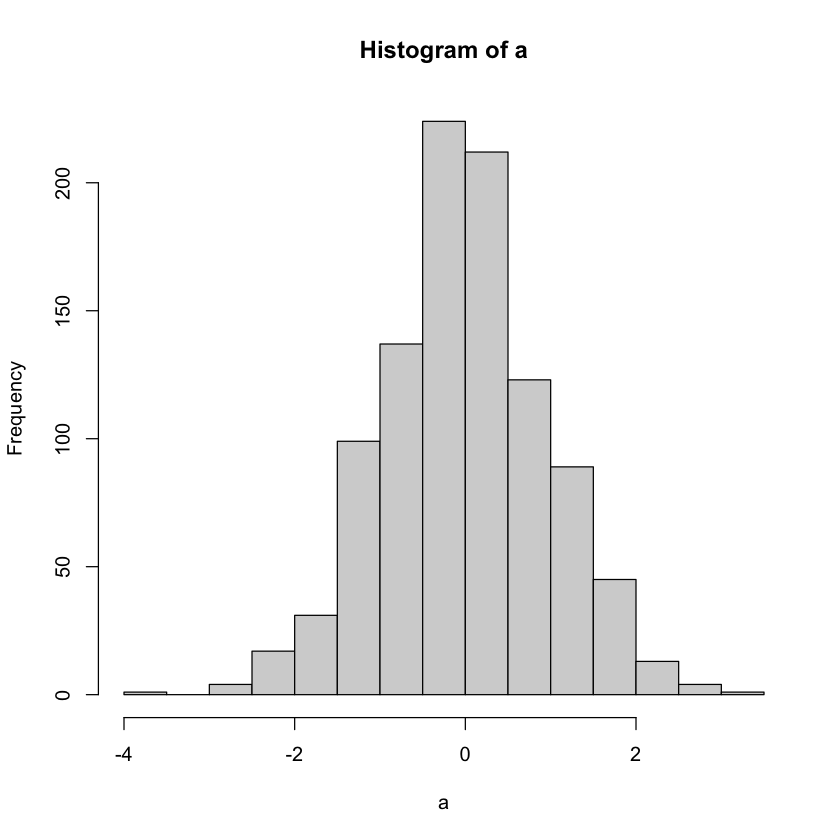

In [80]:
#9
n=1000
a=replicate(1000,(mean(runknown(n))-7.2)*n**0.5/((32.36)**0.5))
hist(a)

In [101]:
#10
random.T <- function(n) {
    return((mean(runknown(n)-7.2))*n**0.5/((32.36)**0.5))
}
a <- replicate(1000, random.T(1000))
mean(a)
var(a)

[1] -0.01480999

[1] 1.011772

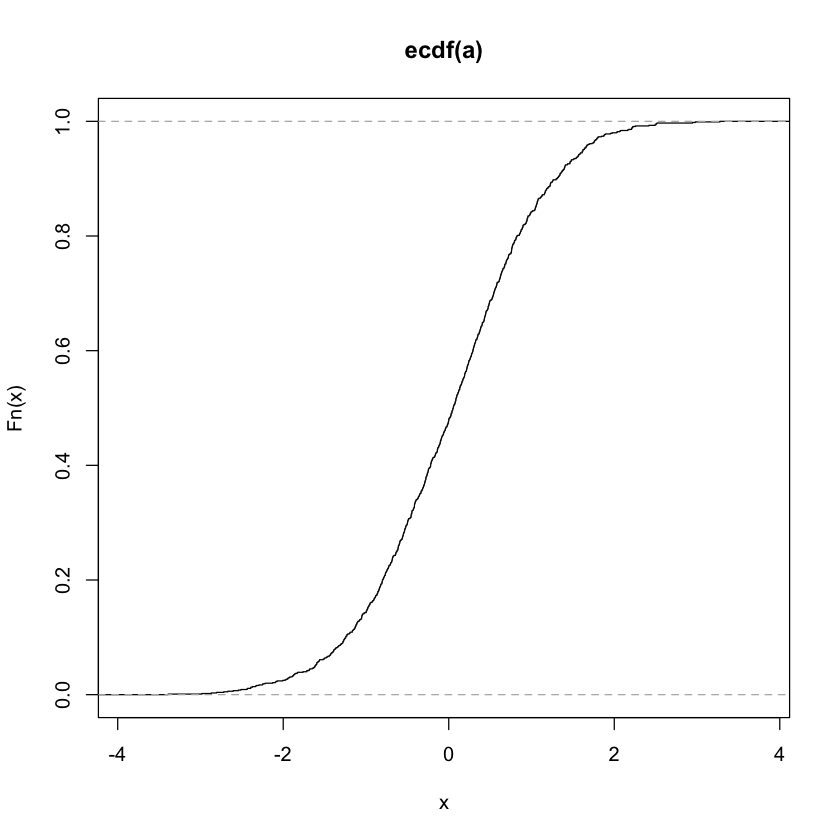

In [95]:
#11
plot(ecdf(a))

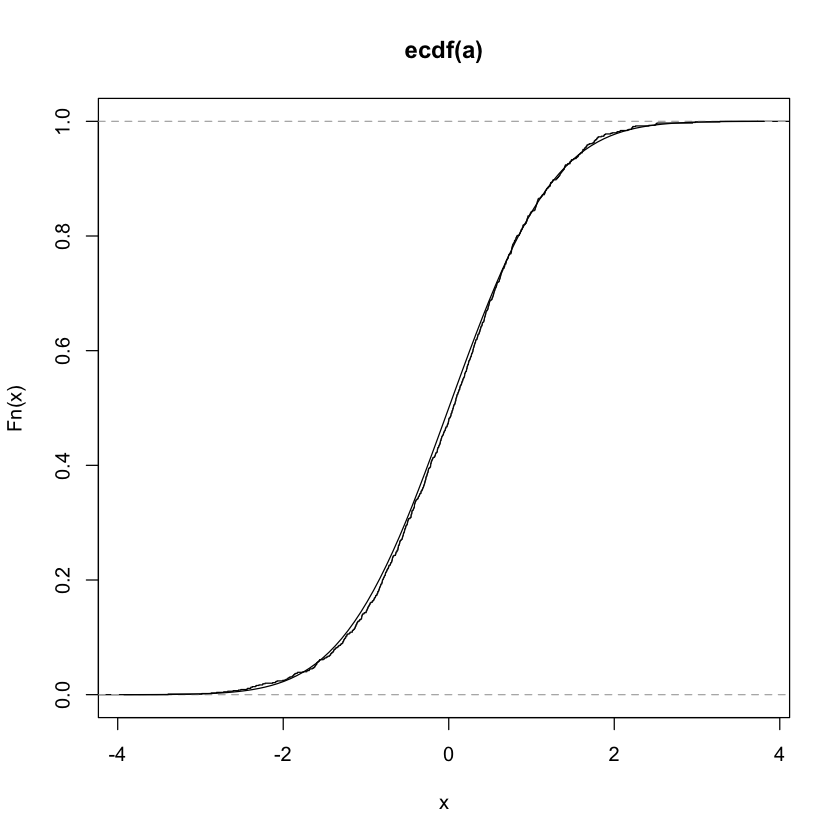

In [98]:
#12
plot(ecdf(a))
curve(pnorm, add=TRUE)

In [40]:
#3 Estimation par maximum de vraisemblance
#14

f = function(x,y) {
    return(y*exp(-y*x))  
}



In [42]:
#15
L <- function(x,y) {
    z=f(x,y)
    a=prod(z)
    return(a)
}



In [43]:
#16
logL <- function(x,y) {
    z=f(x,y)
    a=prod(z)
    return(log(a))
}

In [59]:
#17
a=rexp(100,3)
logL(a,2.7)
logL(a,3.1)

[1] 10.77323

[1] 11.46945

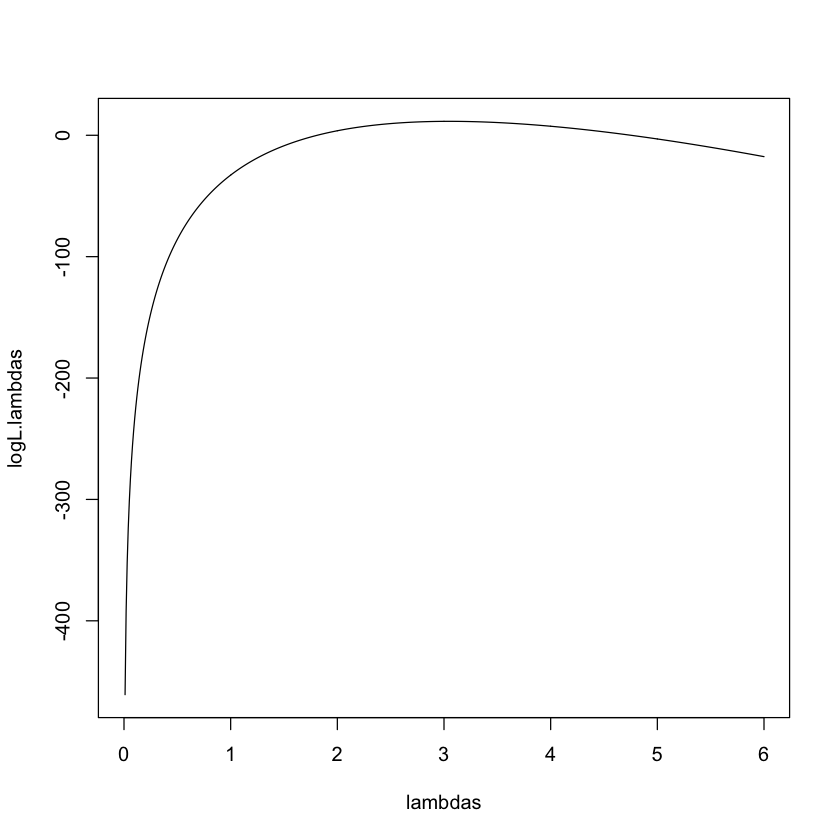

In [62]:
#18
lambdas <- seq(0, 6, 0.01)
logL.lambdas <- sapply(lambdas, function(lambda) logL(a,lambda))
plot(lambdas, logL.lambdas, type = "l")

In [78]:
#19
#P = function(z) {
#    x=rexp(100,3)
#    y=z^length(x)*exp((-z)*sum(x))
#    return(y)
#}

x <- rexp(100, rate = 3)
opt = optimize(logL, lower = 2.9, upper = 3.1, maximum = TRUE,x = x)
opt

$maximum
[1] 3.09995

$objective
[1] 27.13919

In [243]:
#20

P = function() {
    x=rexp(500,3)
    opt = optimize(function(z) z^length(x)*exp((-z)*sum(x)), lower = 2.9, upper = 3.1, maximum = TRUE)
    return(opt)
}

P()

$maximum
[1] 2.971594

$objective
[1] 2.227087e+19

In [298]:
aa=replicate(100,unname(P()))
aaa = as.numeric((unlist(aa[1,])))
mean(aaa)
var(aaa)

[1] 3.005228

[1] 0.005648983

In [4]:
#22
install.packages("numDeriv")
library(numDeriv)

g <- function(x) {
    -(x - pi)^2 
}




The downloaded binary packages are in
	/var/folders/cn/8vhdhtd50yd2cnf2cm9nb2s40000gn/T//RtmpsTZ978/downloaded_packages


[1] 6.283185

In [79]:
#22
install.packages("pracma")
library(pracma)
grad(g,0)


The downloaded binary packages are in
	/var/folders/cn/8vhdhtd50yd2cnf2cm9nb2s40000gn/T//RtmptuiajE/downloaded_packages


ERROR: Error in match.fun(f): objet 'g' introuvable


In [47]:
#23
library(pracma)

G = function(l) {

}

grad((function(l) l^length(x)*exp((-l)*sum(x))),l)

sim.Fisher <- function() {
    x = rexp(100,3)
    lambdas <- seq(0, 6, 0.01)
    tt <- sapply(lambdas, function(lambda) )
}

mean(sim.Fisher())

ERROR: Error in grad((function(l) l^length(x) * exp((-l) * sum(x))), l): 找不到对象'l'
